### Zadanie 5a

In [1]:
import statsmodels.api as sm
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize)

data = load_data('Default')

data['default'] = data['default'].map({'No': 0, 'Yes': 1})

spec = MS(['income', 'balance'])
X = spec.fit_transform(data)
y = data['default']

model = sm.Logit(y, X)
result = model.fit()

summarize(result)

Optimization terminated successfully.
         Current function value: 0.078948
         Iterations 10


,coef,std err,z,P>|z|
intercept,-11.540500,0.435000,-26.544,0.0
income,0.000021,0.000005,4.174,0.0
balance,0.005600,0.000000,24.835,0.0


### Zadanie 5b

In [2]:
from sklearn.model_selection import train_test_split
import numpy as np

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()

summarize(result)

y_pred_prob = result.predict(X_val)

y_pred = np.where(y_pred_prob > 0.5, 1, 0)

validation_error = np.mean(y_pred != y_val)
print(f"Błąd walidacyjny: {validation_error:.4f}")

Optimization terminated successfully.
         Current function value: 0.078256
         Iterations 10
Błąd walidacyjny: 0.0267


In [3]:
from sklearn.model_selection import train_test_split
import numpy as np

print("Random_state = 2")
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=2)

model = sm.Logit(y_train, X_train)
result = model.fit()

summarize(result)

y_pred_prob = result.predict(X_val)

y_pred = np.where(y_pred_prob > 0.5, 1, 0)

validation_error = np.mean(y_pred != y_val)
print(f"Błąd walidacyjny: {validation_error:.4f}")

Random_state = 2
Optimization terminated successfully.
         Current function value: 0.082411
         Iterations 10
Błąd walidacyjny: 0.0237


### Zadanie 5d

In [4]:
data['student'] = data['student'].map({'Yes': 1, 'No': 0})

spec = MS(['income', 'balance', 'student'])
X = spec.fit_transform(data)
y = data['default']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

model = sm.Logit(y_train, X_train)
result = model.fit()

summarize(result)

y_pred_prob = result.predict(X_val)
y_pred = np.where(y_pred_prob > 0.5, 1, 0)

validation_error = np.mean(y_pred != y_val)
print(f"Błąd walidacyjny (z uwzględnieniem 'student'): {validation_error:.4f}")

Optimization terminated successfully.
         Current function value: 0.078031
         Iterations 10
Błąd walidacyjny (z uwzględnieniem 'student'): 0.0267


### Zadanie 8a

In [5]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

### Zadanie 8b

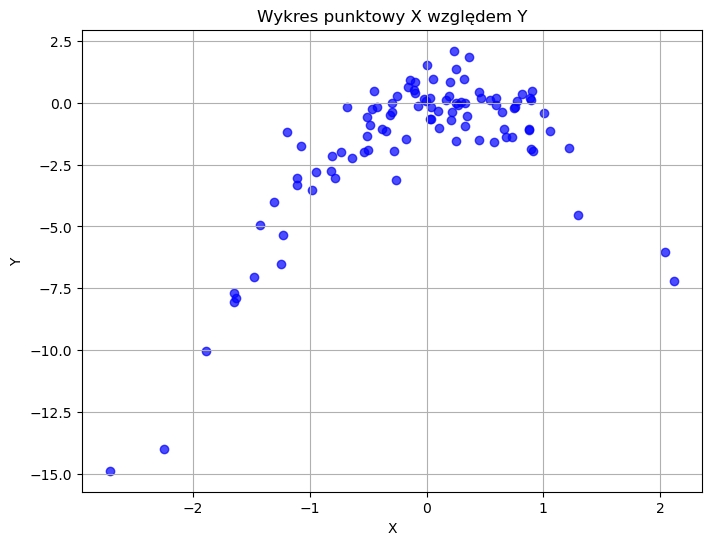

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.7)
plt.xlabel("X")
plt.ylabel("Y")
plt.title("Wykres punktowy X względem Y")
plt.grid(True)
plt.show()

### Zadanie 8c

In [7]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

data = pd.DataFrame({'X': x, 'Y': y})

def loocv_error(data, degree):
    loo = LeaveOneOut()
    X = data[['X']]
    y = data['Y']
    
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly[f'X{d}'] = X['X']**d
    X_poly = sm.add_constant(X_poly)
    
    errors = []
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = sm.OLS(y_train, X_train).fit()

        y_pred = model.predict(X_test)
        errors.append((y_test.values[0] - y_pred.values[0])**2)
    
    return np.mean(errors)

errors = {}
for degree in range(1, 5):
    error = loocv_error(data, degree)
    errors[f'Stopień {degree}'] = error
    print(f"Błąd LOOCV dla modelu stopnia {degree}: {error:.4f}")

Błąd LOOCV dla modelu stopnia 1: 6.6330
Błąd LOOCV dla modelu stopnia 2: 1.1229
Błąd LOOCV dla modelu stopnia 3: 1.3018
Błąd LOOCV dla modelu stopnia 4: 1.3324


### Zadanie 8d

In [8]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

data = pd.DataFrame({'X': x, 'Y': y})

def loocv_error(data, degree):
    loo = LeaveOneOut()
    X = data[['X']]
    y = data['Y']
    
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly[f'X{d}'] = X['X']**d
    X_poly = sm.add_constant(X_poly)
    
    errors = []
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = sm.OLS(y_train, X_train).fit()

        y_pred = model.predict(X_test)
        errors.append((y_test.values[0] - y_pred.values[0])**2)
    
    return np.mean(errors)

errors = {}
for degree in range(1, 5):
    error = loocv_error(data, degree)
    errors[f'Stopień {degree}'] = error
    print(f"Błąd LOOCV dla modelu stopnia {degree}: {error:.4f}")

Błąd LOOCV dla modelu stopnia 1: 6.6330
Błąd LOOCV dla modelu stopnia 2: 1.1229
Błąd LOOCV dla modelu stopnia 3: 1.3018
Błąd LOOCV dla modelu stopnia 4: 1.3324


In [9]:
import pandas as pd
from sklearn.model_selection import LeaveOneOut

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
data = pd.DataFrame({'X': x, 'Y': y})

def loocv_error(data, degree):
    loo = LeaveOneOut()
    
    X_poly = pd.DataFrame()
    for d in range(1, degree + 1):
        X_poly[f'X{d}'] = data['X']**d
    X_poly = sm.add_constant(X_poly)
    y = data['Y']

    errors = []
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly.iloc[train_index], X_poly.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred)**2)

    return np.mean(errors)

errors = {}
for degree in range(1, 5):
    error = loocv_error(data, degree)
    errors[f'Stopień {degree}'] = error
    print(f"Błąd LOOCV dla modelu stopnia {degree}: {error:.4f}")

Błąd LOOCV dla modelu stopnia 1: 6.6330
Błąd LOOCV dla modelu stopnia 2: 1.1229
Błąd LOOCV dla modelu stopnia 3: 1.3018
Błąd LOOCV dla modelu stopnia 4: 1.3324


### Zadanie 8f

In [10]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)
data = pd.DataFrame({'X': x, 'Y': y})

def summarize_model(data, degree):
    X = data[['X']]
    y = data['Y']
    
    X_poly = X.copy()
    for d in range(2, degree + 1):
        X_poly[f'X{d}'] = X['X']**d
    X_poly = sm.add_constant(X_poly)
    
    model = sm.OLS(y, X_poly).fit()
    print(f"\nModel stopnia {degree}:")
    print(summarize(model))

for degree in range(1, 5):
    summarize_model(data, degree)


Model stopnia 1:
         coef  std err      t  P>|t|
const -1.4650    0.247 -5.937    0.0
X      1.9494    0.289  6.752    0.0

Model stopnia 2:
         coef  std err       t  P>|t|
const -0.0728    0.119  -0.611  0.543
X      0.9663    0.126   7.647  0.000
X2    -2.0047    0.091 -22.072  0.000

Model stopnia 3:
         coef  std err       t  P>|t|
const -0.0572    0.120  -0.477  0.635
X      1.1146    0.187   5.945  0.000
X2    -2.0471    0.099 -20.673  0.000
X3    -0.0643    0.060  -1.070  0.287

Model stopnia 4:
         coef  std err       t  P>|t|
const  0.1008    0.136   0.743  0.460
X      0.9050    0.205   4.423  0.000
X2    -2.5059    0.221 -11.336  0.000
X3     0.0338    0.073   0.466  0.642
X4     0.1042    0.045   2.309  0.023


In [11]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

data = pd.DataFrame({'X': x, 'Y': y})

def summarize_model(data, degree):
    X_poly = pd.DataFrame()
    for d in range(1, degree + 1):
        X_poly[f'X{d}'] = data['X']**d
    X_poly = sm.add_constant(X_poly)
    
    model = sm.OLS(data['Y'], X_poly).fit()
    print(f"\nModel stopnia {degree}:")
    print(summarize(model))

for degree in range(1, 5):
    summarize_model(data, degree)


Model stopnia 1:
         coef  std err      t  P>|t|
const -1.4650    0.247 -5.937    0.0
X1     1.9494    0.289  6.752    0.0

Model stopnia 2:
         coef  std err       t  P>|t|
const -0.0728    0.119  -0.611  0.543
X1     0.9663    0.126   7.647  0.000
X2    -2.0047    0.091 -22.072  0.000

Model stopnia 3:
         coef  std err       t  P>|t|
const -0.0572    0.120  -0.477  0.635
X1     1.1146    0.187   5.945  0.000
X2    -2.0471    0.099 -20.673  0.000
X3    -0.0643    0.060  -1.070  0.287

Model stopnia 4:
         coef  std err       t  P>|t|
const  0.1008    0.136   0.743  0.460
X1     0.9050    0.205   4.423  0.000
X2    -2.5059    0.221 -11.336  0.000
X3     0.0338    0.073   0.466  0.642
X4     0.1042    0.045   2.309  0.023


In [12]:
rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

def summarize_model(x, y, degree):
    X_poly = np.column_stack([x**d for d in range(1, degree + 1)])
    X_poly = sm.add_constant(X_poly)
    
    model = sm.OLS(y, X_poly).fit()
    print(f"\nModel stopnia {degree}:")
    print(summarize(model))

for degree in range(1, 5):
    summarize_model(x, y, degree)


Model stopnia 1:
         coef  std err      t  P>|t|
const -1.4650    0.247 -5.937    0.0
x1     1.9494    0.289  6.752    0.0

Model stopnia 2:
         coef  std err       t  P>|t|
const -0.0728    0.119  -0.611  0.543
x1     0.9663    0.126   7.647  0.000
x2    -2.0047    0.091 -22.072  0.000

Model stopnia 3:
         coef  std err       t  P>|t|
const -0.0572    0.120  -0.477  0.635
x1     1.1146    0.187   5.945  0.000
x2    -2.0471    0.099 -20.673  0.000
x3    -0.0643    0.060  -1.070  0.287

Model stopnia 4:
         coef  std err       t  P>|t|
const  0.1008    0.136   0.743  0.460
x1     0.9050    0.205   4.423  0.000
x2    -2.5059    0.221 -11.336  0.000
x3     0.0338    0.073   0.466  0.642
x4     0.1042    0.045   2.309  0.023


In [13]:
from sklearn.model_selection import LeaveOneOut

rng = np.random.default_rng(1)
x = rng.normal(size=100)
y = x - 2 * x**2 + rng.normal(size=100)

def loocv_error(x, y, degree):
    loo = LeaveOneOut()
    
    X_poly = np.column_stack([x**d for d in range(1, degree + 1)])
    X_poly = sm.add_constant(X_poly)
    
    errors = []
    for train_index, test_index in loo.split(X_poly):
        X_train, X_test = X_poly[train_index], X_poly[test_index]
        y_train, y_test = y[train_index], y[test_index]

        model = sm.OLS(y_train, X_train).fit()
        y_pred = model.predict(X_test)
        errors.append((y_test - y_pred)**2)

    return np.mean(errors)

errors = {}
for degree in range(1, 5):
    error = loocv_error(x, y, degree)
    errors[f'Stopień {degree}'] = error
    print(f"Błąd LOOCV dla modelu stopnia {degree}: {error:.4f}")

Błąd LOOCV dla modelu stopnia 1: 6.6330
Błąd LOOCV dla modelu stopnia 2: 1.1229
Błąd LOOCV dla modelu stopnia 3: 1.3018
Błąd LOOCV dla modelu stopnia 4: 1.3324
